In [25]:
import pandas as pd
import numpy  as np

import importlib

from pyearth import Earth
from pyearth import export

%matplotlib inline

In [26]:
#!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/experiment/params/pf.py
import pf
importlib.reload(pf)

<module 'pf' from '/home/zwieteri/git/corona/experiment/params/pf.py'>

We use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [27]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-12-08 12:26:37--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 65.9.73.3, 65.9.73.44, 65.9.73.79, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|65.9.73.3|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [28]:
df = pd.read_excel(
    'COVID-19-geographic-disbtribution-worldwide.xlsx',
    keep_default_na=False,
    na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
1 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
2 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
3 2020-12-05    5     12  2020    235      18             Afghanistan    AF   
4 2020-12-04    4     12  2020    119       5             Afghanistan    AF   
5 2020-12-03    3     12  2020    202      19             Afghanistan    AF   
6 2020-12-02    2     12  2020    400      48             Afghanistan    AF   
7 2020-12-01    1     12  2020    272      11             Afghanistan    AF   
8 2020-11-30   30     11  2020      0       0             Afghanistan    AF   
9 2020-11-29   29     11  2020    228      11             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           7.094835           
1                                           7.215755           
2                                           7.326160           
3                                           7.115865           
4                                           7.107979           
5                                           7.536455           
6                                           7.005460           
7                                           6.960772           
8                                           6.416633           
9                                           6.845110

Last check of our source dataframe.

In [29]:
df.count()

dateRep                                                       60622
day                                                           60622
month                                                         60622
year                                                          60622
cases                                                         60622
deaths                                                        60622
countriesAndTerritories                                       60622
geoId                                                         60622
countryterritoryCode                                          60505
popData2019                                                   60505
continentExp                                                  60622
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    57749
dtype: int64

We pivot to a country by column format.

In [30]:
df_geo = df.pivot_table(
    index   = pf.datcol,
    columns = pf.geocol,
    values  = pf.cascol,
    aggfunc = 'sum').fillna(0)
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0     0.0   
2020-01-01   0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0     0.0   
2020-01-02   0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0     0.0   
2020-01-03   0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0     0.0   
2020-01-04   0.0     0.0    0.0  0.0  0.0    0.0     0.0    0.0     0.0   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-04  62.0  1317.0  119.0  0.0  0.0  782.0  1184.0   42.0  7625.0   
2020-12-05  51.0  1311.0  235.0  0.0  1.0  801.0  1267.0  132.0  6899.0   
2020-12-06  50.0  1214.0  234.0  0.0  0.0  846.0   978.0   43.0  5201.0   
2020-12-07  45.0  1153.0  210.0  2.0  2.0  840.0   407.0    0.0  3278.0   
2020-12-08  34.0  1148.0  200.0  0.0  0.0  695.0   584.0  112.0  3216.0   

                    ... deaths                                              \
geoId           AT  ...     VG   VI   VN   VU   WF    XK    YE     ZA   ZM   
dateRep             ...                                                      
2019-12-31     0.0  ...    0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2020-01-01     0.0  ...    0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2020-01-02     0.0  ...    0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2020-01-03     0.0  ...    0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2020-01-04     0.0  ...    0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0  0.0   
...            ...  ...    ...  ...  ...  ...  ...   ...   ...    ...  ...   
2020-12-04  3783.0  ...    0.0  0.0  0.0  0.0  0.0  22.0   3.0   94.0  0.0   
2020-12-05  3634.0  ...    0.0  0.0  0.0  0.0  0.0  11.0   3.0  160.0  7.0   
2020-12-06  3160.0  ...    0.0  0.0  0.0  0.0  0.0  14.0   6.0  104.0  0.0   
2020-12-07  2745.0  ...    0.0  0.0  0.0  0.0  0.0  19.0   6.0  139.0  0.0   
2020-12-08  2181.0  ...    0.0  0.0  0.0  0.0  0.0  14.0  10.0   43.0  0.0   

                  
geoId         ZW  
dateRep           
2019-12-31   0.0  
2020-01-01   0.0  
2020-01-02   0.0  
2020-01-03   0.0  
2020-01-04   0.0  
...          ...  
2020-12-04   3.0  
2020-12-05   0.0  
2020-12-06  11.0  
2020-12-07   0.0  
2020-12-08   3.0  

[344 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [31]:
new_index = pd.date_range(
    df_geo.index.min(),
    df_geo.index.max() + pd.Timedelta(pf.futext))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                               ... deaths  \
geoId         AD   AE   AF   AG   AI   AL   AM   AO   AR   AT  ...     VG   
2019-12-31   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-01   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-02   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-03   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-04   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
2021-12-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-12-05   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-12-06   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-12-07   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-12-08   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   

                                                         
geoId        VI   VN   VU   WF   XK   YE   ZA   ZM   ZW  
2019-12-31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  
2021-12-04  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-12-05  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-12-06  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-12-07  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-12-08  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[709 rows x 428 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [32]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    709.000000
mean     354.000000
std      204.814957
min        0.000000
25%      177.000000
50%      354.000000
75%      531.000000
max      708.000000
Name: daynum, dtype: float64

The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [33]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [34]:
#!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/experiment/params/pr.py
import pr
importlib.reload(pr)

<module 'pr' from '/home/zwieteri/git/corona/experiment/params/pr.py'>

In [35]:
wave = pr.firstwav

# Initialize predicted measure, create smoothed measure and remaining cases
df_geo[(pr.pmeasure, pr.geo)] = 0
df_geo[(pr.smeasure, pr.geo)] = df_geo[pr.measure][pr.geo].loc[:].rolling(pr.sdays).mean()
df_geo[(pr.rmeasure, pr.geo)] = df_geo[pr.smeasure][pr.geo]

# Always plot smoothed and predicted measures, adding waves when found
plotlist = [(pr.smeasure, pr.geo), (pr.pmeasure, pr.geo)]

In [36]:
# Get full name and population from the original dataset
geonam = df[df[pf.geocol] == pr.geo][pf.namcol].iloc[0]
geopop = df[df[pf.geocol] == pr.geo][pf.popcol].iloc[0]

# We use 1 in a million cases, but at least 2
mincases = max(geopop / pr.popcases, pr.mincases)

In [37]:
print('Running multiple wave analysis for {} with population {:1.0f}'.format(geonam, geopop))
print('Minimum number of cases is {:1.0f}'.format(mincases))

while True:
    # Create potential wave
    curwave = pr.wmeasure + str((wave) + (10 ** pr.wavenum))[-pr.wavenum:]
    df_geo[(curwave, pr.geo)] = 0

    # Create a dataframe for projections
    df_proj = pd.DataFrame({'daynum':df_geo['daynum'],
                            'measure':df_geo[pr.rmeasure][pr.geo]})

    # Create the Gumbel division and select suitable measures
    df_proj['gumdiv'] = df_proj['measure'] / df_proj['measure'].cumsum()
    df_proj = df_proj[(df_proj['gumdiv'] > 0) & (df_proj['measure'] > mincases)]

    # Reduce to log scale and select relevant measures
    df_proj['linear'] = np.log(df_proj['gumdiv'])
    df_proj = df_proj[(df_proj['linear'] < pr.linmax) &
                      (df_proj['linear'] > pr.linmin)]

    # Do we still have data left?
    if len(df_proj) <= 1:
        print('--- no data left')
        break
    
    # Create input vectors for regression splines and build a model
    eax = df_proj['daynum'].values.reshape(-1, 1)
    eay = df_proj['linear'].values.reshape(-1, 1)
    eamodel = Earth(**pr.earth)
    eamodel.fit(eax, eay)

    # Store the results
    df_proj['earth'] = eamodel.predict(eax)

    # Find the day range
    daymin = df_proj['daynum'].min()
    daymax = df_proj['daynum'].max()

    # Find the gradient of generated regression splines
    df_proj['gbgrad'] = df_proj['linear'] - df_proj['linear'].shift(1)
    df_proj['eagrad'] = df_proj['earth'] - df_proj['earth'].shift(1)
    
    # Knots are found when the gradient changes, including start and end
    df_proj['knot'] = ((abs(df_proj['eagrad'] - df_proj['eagrad'].shift(1)) > pr.gradmin) |
                       (df_proj['daynum'] == (daymin + 1)) |
                       (df_proj['daynum'] == daymax))

    # Starting day of each spline
    df_proj['daycount'] = df_proj.reset_index().index

    # Select the knots and find the actual number of days for each spline
    df_knot = df_proj[df_proj['knot']][['daynum', 'daycount', 'eagrad']]
    df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
    df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

    # Candidate knots have a negative gradient and a minimum number of days
    df_knot['cand'] = ((df_knot['eagrad'] < -(1 / pr.betamax)) &
                       (df_knot['daysdata'] >= pr.datamin))

    # We want early knots with a low gradient and many days
    df_knot['since'] = df_knot['daynum'] - daymin
    df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
    df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

    # Did we find another wave?
    choice = df_knot[df_knot['choice']]
    if len(choice) == 0:
        print('--- no data for wave')
        break
    
    # Find the interval of the selected spline
    lower = choice['daynum'].values[0]
    upper = choice['daysdata'].values[0] + lower
    df_proj = df_proj[(df_proj['daynum'] >= lower) &
                      (df_proj['daynum'] <= upper)].copy()

    # Calculate slope and intercept as basis for beta and mu
    fitmod = export.export_python_function(eamodel)
    slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
    intercept = fitmod([[lower]])[0] - (lower * slope)
    beta = - 1 / slope
    mu = beta * (intercept + np.log(beta))

    # Apply the Gumbel PDF according to beta and mu and find the scale
    df_proj['pgumb'] = gumpdf(df_proj['daynum'], beta, mu)
    df_proj['scale'] = df_proj['measure'] / df_proj['pgumb']
    final = df_proj['scale'].mean()
    fincv = df_proj['scale'].std() / final

    # Calculate the current wave and its parameters
    df_geo[(curwave, pr.geo)] = final * gumpdf(df_geo['daynum'], beta, mu)
    peak = df_geo[df_geo[(curwave, pr.geo)] == df_geo[(curwave, pr.geo)].max()].index.min()
    start = df_geo[(df_geo[(curwave, pr.geo)] >= pr.projmin) &
                   (df_geo[(curwave, pr.geo)].index < peak)].index.min()
    floor = df_geo[(df_geo[(curwave, pr.geo)] < pr.projmin) &
                   (df_geo[(curwave, pr.geo)].index > peak)].index.min()
    print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
        curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))

    # Move the data from remainder to prediction
    df_geo[(pr.pmeasure, pr.geo)] += df_geo[(curwave, pr.geo)]
    df_geo[(pr.rmeasure, pr.geo)] -= df_geo[(curwave, pr.geo)]
    plotlist += [(curwave, pr.geo)]
    wave += 1

Running multiple wave analysis for Netherlands with population 17282163
Minimum number of cases is 17
Wave 01 beta 10.320 mu  82 fit 0.898 peak 2020-03-22 from 2020-03-01 to 2020-05-20 size 3249
Wave 02 beta 11.278 mu  96 fit 0.819 peak 2020-04-05 from 2020-03-10 to 2020-07-02 size 27505
Wave 03 beta  2.696 mu  93 fit 0.453 peak 2020-04-02 from 2020-03-28 to 2020-04-16 size 550
Wave 04 beta  8.538 mu 112 fit 0.817 peak 2020-04-21 from 2020-04-02 to 2020-06-22 size 12128
Wave 05 beta  7.138 mu 136 fit 0.841 peak 2020-05-15 from 2020-05-01 to 2020-06-24 size 1936
Wave 06 beta  5.957 mu 151 fit 0.940 peak 2020-05-30 from 2020-05-18 to 2020-07-03 size 1873
Wave 07 beta  7.271 mu 167 fit 0.938 peak 2020-06-15 from 2020-05-31 to 2020-07-29 size 3012
Wave 08 beta  5.370 mu 186 fit 0.842 peak 2020-07-04 from 2020-06-24 to 2020-07-30 size 634
Wave 09 beta 11.518 mu 211 fit 0.890 peak 2020-07-29 from 2020-07-05 to 2020-10-05 size 4259
Wave 10 beta 14.824 mu 234 fit 0.858 peak 2020-08-21 from 202

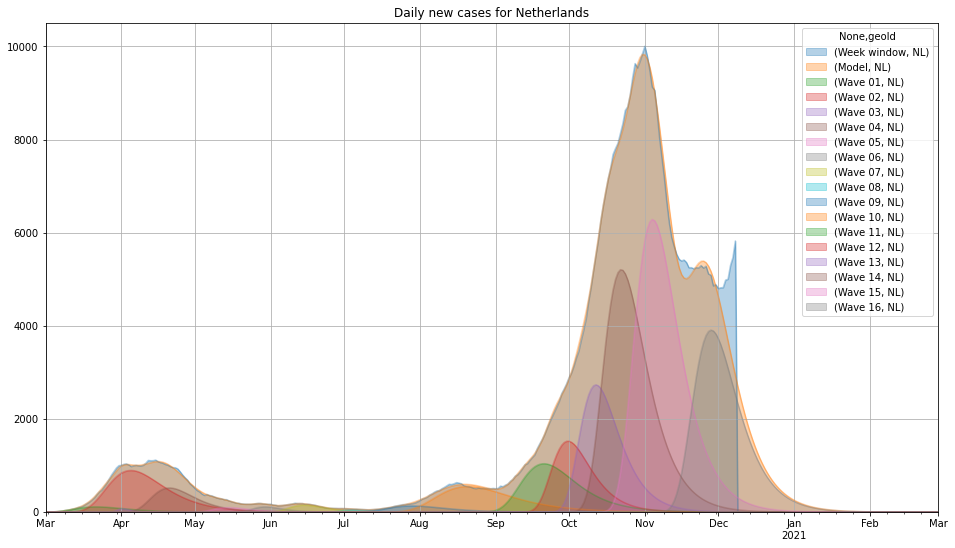

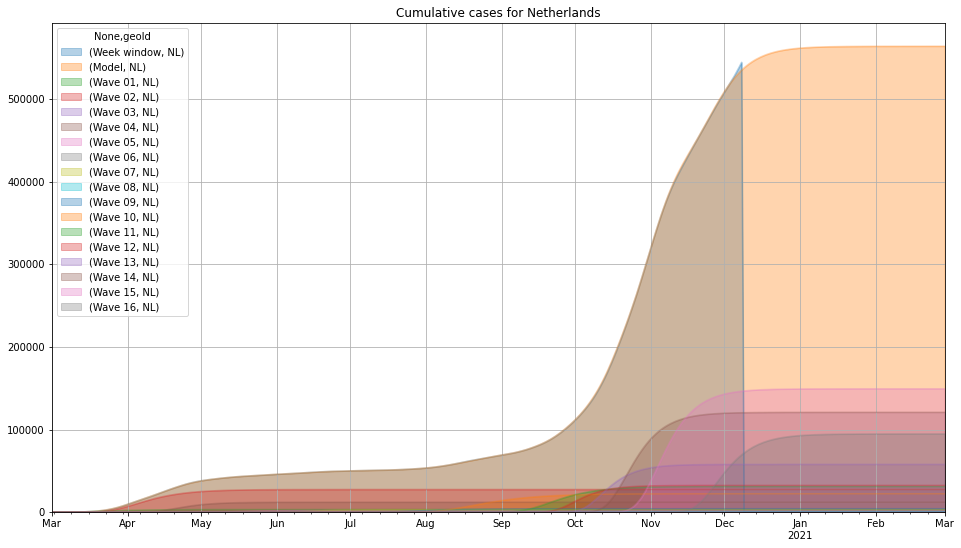

In [38]:
df_geo[plotlist].loc[pr.plotmin:pr.plotmax].plot(
    **pr.plot,
    title=pr.plnew+geonam)
df_geo[plotlist].loc[pr.plotmin:pr.plotmax].cumsum().plot(
    **pr.plot,
    title=pr.plcum+geonam)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [39]:
progress = df_geo[pr.measure][pr.geo].sum() / df_geo[pr.pmeasure][pr.geo].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pr.pmeasure][pr.geo].sum()))

Currently at 100.00% of 563600


The peak date is at the maximum value.

In [40]:
peak = df_geo[df_geo[(pr.pmeasure, pr.geo)] == df_geo[(pr.pmeasure, pr.geo)].max()].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-10-31


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [41]:
print('Peak by last mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by last mu at 2020-11-28


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [42]:
floor = df_geo[(df_geo[(pr.pmeasure, pr.geo)] < (geopop / pr.popcases)) &
               (df_geo[(pr.pmeasure, pr.geo)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2021-01-26


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [43]:
start = df_geo[(df_geo[(pr.pmeasure, pr.geo)] > (geopop / pr.popcases)) &
               (df_geo[(pr.pmeasure, pr.geo)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-07


We define the maximum delta as the day in the curve with the sharpest rise.

In [44]:
maxrise = (df_geo[(pr.pmeasure, pr.geo)] - df_geo[(pr.pmeasure, pr.geo)].shift()).max()
maxdelta = df_geo[(df_geo[(pr.pmeasure, pr.geo)] - df_geo[(pr.pmeasure, pr.geo)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 356 on 2020-10-13


This should match the maximum gradient of the daily data.

In [45]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pr.pmeasure, pr.geo)]).max()))

Maximum gradient is 354


Back to the original curve, showing the number of infected concurrently.

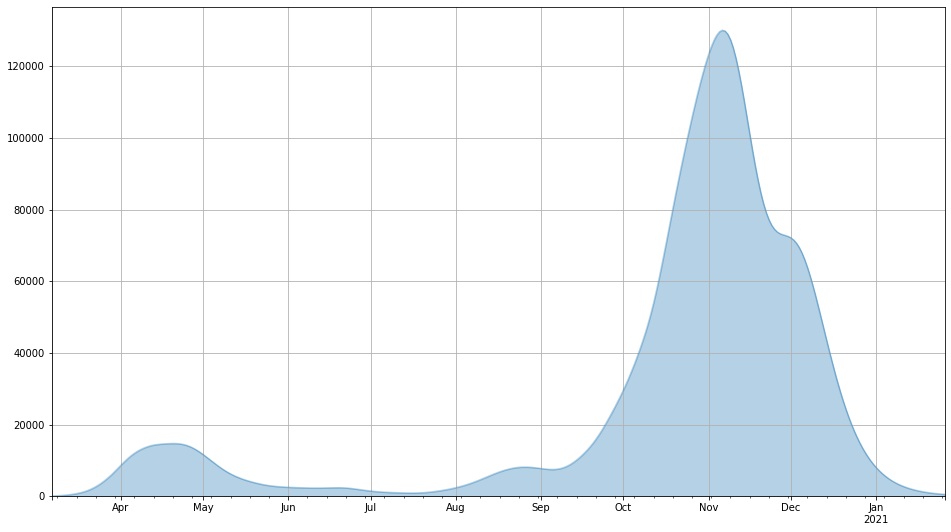

In [46]:
df_geo[pr.pmeasure][pr.geo].rolling(pr.infdays).sum().loc[start:floor].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

The top of this curve gives the maximum number of people that are infected at the same time.

In [47]:
print('Maximum infected is {:1.0f}'.format(df_geo[pr.pmeasure][pr.geo].rolling(pr.infdays).sum().max()))

Maximum infected is 130034


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

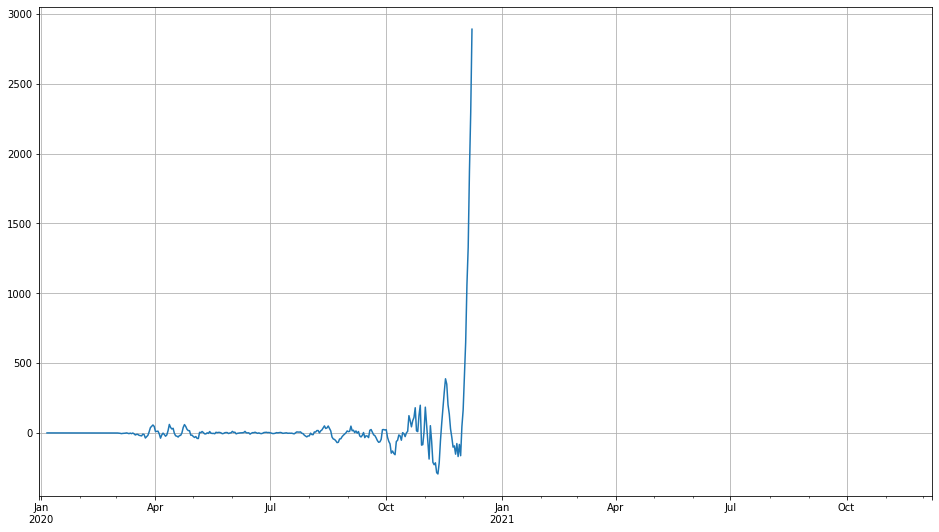

In [48]:
(df_geo[(pr.smeasure, pr.geo)] - df_geo[(pr.pmeasure, pr.geo)]).rolling(pr.sresid).mean().loc[:].plot(
    figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.